<a href="https://colab.research.google.com/github/moraish/AOE_data_analysis/blob/main/AOE_2_ANALYSIS_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Age of Empires - II

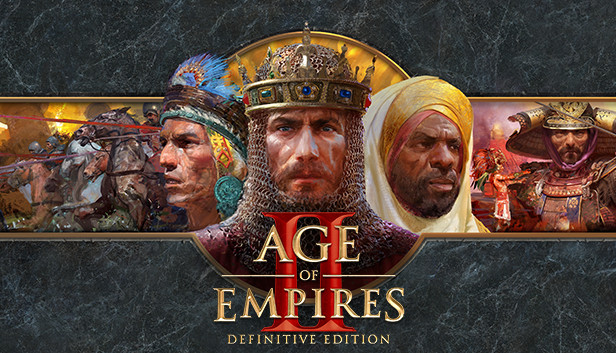


This notebook explores data from the game Age of Empires 2, focusing on maps, civilizations, player performance, and game dynamics.

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load data
matches_path = '/content/matches.parquet'
players_path = '/content/players.parquet'

### Data Overview
Let's inspect the structure of the data.

In [3]:
matches = pd.read_parquet(matches_path)
players = pd.read_parquet(players_path)

In [4]:
matches.head()

,map,started_timestamp,duration,irl_duration,game_id,avg_elo,num_players,team_0_elo,team_1_elo,replay_enhanced,leaderboard,mirror,patch,raw_match_type,game_type,game_speed,starting_age
0,nomad,2025-01-12 00:00:39+00:00,0 days 00:05:14.500000,0 days 00:03:05,364717295,1427.833333,6,1425.666667,1430.0,False,team_random_map,False,125283,8,random_map,normal,dark
1,arabia,2025-01-12 00:08:07+00:00,0 days 00:07:01.600000,0 days 00:04:08,364718531,1460.250000,8,1476.500000,1444.0,False,team_random_map,False,125283,9,random_map,normal,dark
2,arena,2025-01-12 00:18:23+00:00,0 days 00:00:13.600000,0 days 00:00:08,364720393,1202.000000,2,1208.000000,1196.0,False,random_map,False,125283,6,random_map,normal,dark
3,arabia,2025-01-12 00:02:20+00:00,0 days 00:27:35.800000,0 days 00:16:14,364717802,1094.000000,2,1114.000000,1074.0,False,random_map,False,125283,6,random_map,normal,dark
4,black_forest,2025-01-12 00:08:07+00:00,0 days 00:20:25.700000,0 days 00:12:01,364718550,1314.125000,8,1304.750000,1323.5,False,team_random_map,False,125283,9,random_map,normal,dark


In [5]:
players.head()

,winner,game_id,team,feudal_age_uptime,castle_age_uptime,imperial_age_uptime,old_rating,new_rating,match_rating_diff,replay_summary_raw,profile_id,civ,opening
0,True,364722256,0,None,None,None,1064,1081,-0.5,{},3133161,mongols,None
1,False,364722256,1,None,None,None,1103,1086,0.5,{},3558673,turks,None
2,True,364722256,0,None,None,None,1108,1123,-0.5,{},407302,koreans,None
3,False,364722256,1,None,None,None,1032,1018,0.5,{},2392591,italians,None
4,True,364722256,0,None,None,None,1113,1136,-0.5,{},21737392,goths,None


## Data Dictionary

### Matches
1. map - game map
2. duration - length of the game
3. game_id - unique game identifier
4. avg_elo - average rating of the players involved in the game
5. num_players - number of players involved in the game
6. team_0_elo - average rating of the players in the first team
7. team_1_elo - average rating of the players in the second team

### Players
1. winner - 1 for winner and 0 for loser
2. game_id - unique game identifier
3. team - player team_number 0 or 1
4. profile_id - unique player id
5. civ - civilization selected by the player

## Data Cleaning

1. Removing columns that are not required
2. Validating the data in the remaining columns

In [6]:
trimmed_matches = matches.drop(columns=['replay_enhanced', 'leaderboard', 'mirror', 'patch', 'raw_match_type', 'game_type', 'game_speed', 'starting_age' ])
trimmed_matches.head()

,map,started_timestamp,duration,irl_duration,game_id,avg_elo,num_players,team_0_elo,team_1_elo
0,nomad,2025-01-12 00:00:39+00:00,0 days 00:05:14.500000,0 days 00:03:05,364717295,1427.833333,6,1425.666667,1430.0
1,arabia,2025-01-12 00:08:07+00:00,0 days 00:07:01.600000,0 days 00:04:08,364718531,1460.250000,8,1476.500000,1444.0
2,arena,2025-01-12 00:18:23+00:00,0 days 00:00:13.600000,0 days 00:00:08,364720393,1202.000000,2,1208.000000,1196.0
3,arabia,2025-01-12 00:02:20+00:00,0 days 00:27:35.800000,0 days 00:16:14,364717802,1094.000000,2,1114.000000,1074.0
4,black_forest,2025-01-12 00:08:07+00:00,0 days 00:20:25.700000,0 days 00:12:01,364718550,1314.125000,8,1304.750000,1323.5


In [7]:
trimmed_players = players.drop(columns=['feudal_age_uptime', 'castle_age_uptime', 'imperial_age_uptime', 'replay_summary_raw', 'opening'])
trimmed_players.head()

,winner,game_id,team,old_rating,new_rating,match_rating_diff,profile_id,civ
0,True,364722256,0,1064,1081,-0.5,3133161,mongols
1,False,364722256,1,1103,1086,0.5,3558673,turks
2,True,364722256,0,1108,1123,-0.5,407302,koreans
3,False,364722256,1,1032,1018,0.5,2392591,italians
4,True,364722256,0,1113,1136,-0.5,21737392,goths


In [8]:
merged_data = pd.merge(trimmed_players, trimmed_matches, on='game_id')
merged_data.head()

,winner,game_id,team,old_rating,new_rating,match_rating_diff,profile_id,civ,map,started_timestamp,duration,irl_duration,avg_elo,num_players,team_0_elo,team_1_elo
0,True,364722256,0,1064,1081,-0.5,3133161,mongols,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0
1,False,364722256,1,1103,1086,0.5,3558673,turks,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0
2,True,364722256,0,1108,1123,-0.5,407302,koreans,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0
3,False,364722256,1,1032,1018,0.5,2392591,italians,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0
4,True,364722256,0,1113,1136,-0.5,21737392,goths,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0


# General Analysis


#### 1. Map Popularity

In [9]:
map_popularity = trimmed_matches['map'].value_counts().reset_index()
map_popularity.columns = ['map', 'count']
px.bar(map_popularity, x='map', y='count', title='Map Popularity')

#### 2. Civilization Popularity

In [10]:
civ_popularity = merged_data['civ'].value_counts().reset_index()
civ_popularity.columns = ['civ', 'count']
px.bar(civ_popularity, x='civ', y='count', title='Civilization Popularity')

#### 3. Civilization Win Rates

In [11]:

civ_win_rates = merged_data.groupby('civ')['winner'].mean().reset_index()
civ_win_rates.columns = ['civ', 'win_rate']

civ_win_rates = civ_win_rates.sort_values(by='win_rate', ascending=False)

px.bar(civ_win_rates, x='civ', y='win_rate', title='Civilization Win Rates', labels={'civ': 'Civilization', 'win_rate': 'Win Rate'})


#### ELO Distribution

1. Take distinct profile id, and max(new_rating) from the players dataframe.
2. Find the min and max player ratings.
3. Make suitable bins based on the range of ratings found.
4. Represent the data using a visualization.

In [12]:
# Group by profile_id and take the max new_rating for each player
player_max_ratings = players.groupby('profile_id')['new_rating'].max().reset_index()
player_max_ratings.columns = ['profile_id', 'max_rating']

player_max_ratings.head()

,profile_id,max_rating
0,132,1450
1,133,1272
2,168,998
3,294,1771
4,317,828


In [13]:
min_rating = player_max_ratings['max_rating'].min()
max_rating = player_max_ratings['max_rating'].max()

print(f"Number of disting players: {len(player_max_ratings)}")

print(f"Minimum Rating: {min_rating}")
print(f"Maximum Rating: {max_rating}")

Number of disting players: 68378
Minimum Rating: 0
Maximum Rating: 2853


Using **Sturges'** Rule:

Number of bins = log2(n) + 1

In [14]:
# Using Sturges' Rule:

number_bins = np.log2(len(player_max_ratings)) + 1
number_bins = np.ceil(number_bins)

bin_size = (max_rating - min_rating) / number_bins

print(f"Number of bins: {number_bins}")
print(f"Bin size: {bin_size}")


Number of bins: 18.0
Bin size: 158.5


In [15]:
bins = np.arange(min_rating, max_rating + bin_size, bin_size)

# adding a bin column to the dataframe
player_max_ratings['rating_bin'] = pd.cut(player_max_ratings['max_rating'], bins=bins)
player_max_ratings.head()

,profile_id,max_rating,rating_bin
0,132,1450,"(1426.5, 1585.0]"
1,133,1272,"(1268.0, 1426.5]"
2,168,998,"(951.0, 1109.5]"
3,294,1771,"(1743.5, 1902.0]"
4,317,828,"(792.5, 951.0]"


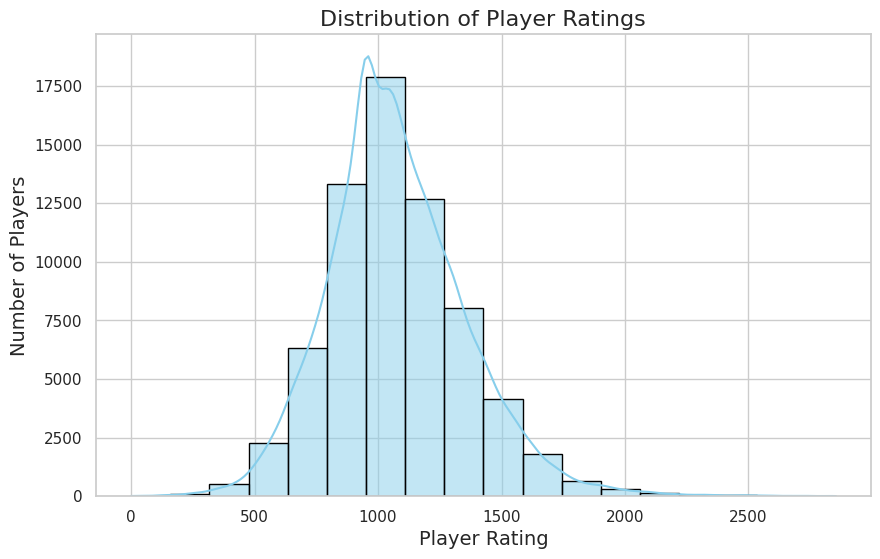

In [16]:
sns.set(style="whitegrid")

# Plot the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(
    player_max_ratings['max_rating'],
    bins=bins,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

# Add labels and title
plt.title('Distribution of Player Ratings', fontsize=16)
plt.xlabel('Player Rating', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)

# Show the plot
plt.show()


#### Matchup Comparison

1. Filter games with only 2 players
2. Extract matchup data
3. Visualize

In [17]:
one_vs_one = merged_data[merged_data['num_players'] == 2]

matchups = one_vs_one.groupby('game_id').apply(
    lambda x: pd.Series({
        'player_1_civ': x.iloc[0]['civ'],
        'player_2_civ': x.iloc[1]['civ'],
        'winner': x.iloc[0]['civ'] if x.iloc[0]['winner'] == 1 else x.iloc[1]['civ']
    })
).reset_index()



<ipython-input-17-7d3a2c21bf59>:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [18]:
matchups.head()

,game_id,player_1_civ,player_2_civ,winner
0,364717265,persians,spanish,spanish
1,364717305,persians,armenians,armenians
2,364717351,romans,khmer,romans
3,364717354,aztecs,britons,britons
4,364717360,lithuanians,persians,persians


In [19]:
# Create a matchup key (e.g., "Franks vs Britons")
matchups['matchup'] = matchups.apply(
    lambda x: f"{x['player_1_civ']} vs {x['player_2_civ']}", axis=1
)

# Count the frequency of each matchup
matchup_counts = matchups['matchup'].value_counts().reset_index()
matchup_counts.columns = ['matchup', 'count']

In [20]:
heatmap_data = matchups.pivot_table(
    index='player_1_civ',
    columns='player_2_civ',
    values='game_id',
    aggfunc='count',
    fill_value=0
)

In [21]:
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Player 2 Civilization", y="Player 1 Civilization", color="Number of Games"),
    title="Most Common and Rare Civilization Matchups in 1v1 Games"
)
fig.show()

In [22]:
top_10_common = matchup_counts.head(10)
top_10_rare = matchup_counts.tail(10)

print("Top 10 Most Common Matchups:")
print(top_10_common)

print("\nTop 10 Rarest Matchups:")
print(top_10_rare)

Top 10 Most Common Matchups:
               matchup  count
0   mongols vs mongols   1066
1    franks vs mongols    505
2     franks vs franks    500
3    mongols vs franks    492
4      mongols vs huns    469
5   magyars vs mongols    434
6   mongols vs magyars    430
7      huns vs mongols    422
8  persians vs mongols    403
9  mongols vs persians    377

Top 10 Rarest Matchups:
                       matchup  count
2015       slavs vs dravidians     14
2016      romans vs dravidians     14
2017          burmese vs slavs     14
2018      tatars vs dravidians     13
2019         burmese vs romans     13
2020    dravidians vs italians     13
2021   dravidians vs armenians     13
2022      burmese vs armenians     11
2023     armenians vs bengalis     10
2024  dravidians vs dravidians      9


# Player Performance Analysis:

- These analysis were suggested by deepseek's DeepThink R1.

1. Win rate by player (profile_id) across all games.

2. Average ELO change per player over time

3. Most played civilization per player and their win rate with it.

#### Win Rate by Player

In [23]:
player_games = players['profile_id'].value_counts().reset_index()
player_games.columns = ['profile_id', 'num_games']
player_games.head()

,profile_id,num_games
0,3519367,224
1,2734385,206
2,21854568,179
3,337640,177
4,3288518,177


In [24]:
player_wins = players[['winner', 'profile_id']].groupby('profile_id').sum('winner').reset_index()
player_wins.columns = ['profile_id', 'num_wins']
player_wins.head()

,profile_id,num_wins
0,132,1
1,133,2
2,168,4
3,294,9
4,317,1


In [28]:
player_win_rate = pd.merge(player_wins, player_games, on='profile_id')
player_win_rate['win_rate'] = player_win_rate['num_wins'] / player_win_rate['num_games']

# Filtering for players who have more than 50 games - removes 1 game, 1 win, 100% win rate scenarios
player_win_rate = player_win_rate[player_win_rate['num_games'] > 50].sort_values(by='win_rate', ascending=False)
player_win_rate.head()

,profile_id,num_wins,num_games,win_rate
11829,1595465,80,89,0.898876
53918,15356375,46,53,0.867925
67611,21762603,46,59,0.779661
50131,12845395,49,63,0.777778
37486,6316206,45,58,0.775862


#### Heighest ELO gain

In [31]:
merged_data.head()

,winner,game_id,team,old_rating,new_rating,match_rating_diff,profile_id,civ,map,started_timestamp,duration,irl_duration,avg_elo,num_players,team_0_elo,team_1_elo
0,True,364722256,0,1064,1081,-0.5,3133161,mongols,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0
1,False,364722256,1,1103,1086,0.5,3558673,turks,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0
2,True,364722256,0,1108,1123,-0.5,407302,koreans,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0
3,False,364722256,1,1032,1018,0.5,2392591,italians,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0
4,True,364722256,0,1113,1136,-0.5,21737392,goths,lombardia,2025-01-12 00:29:26+00:00,0 days 00:26:12.500000,0 days 00:15:25,1075.75,8,1075.5,1076.0


In [40]:
player_rating_0 = merged_data.groupby('profile_id')['old_rating'].first().reset_index()
player_rating_0.columns = ['profile_id', 'rating_0']
player_rating_0.head()

,profile_id,rating_0
0,132,1434
1,133,1272
2,168,981
3,294,1692
4,317,812


In [41]:
player_rating_1 = merged_data.groupby('profile_id')['new_rating'].last().reset_index()
player_rating_1.columns = ['profile_id', 'rating_1']
player_rating_1.head()

,profile_id,rating_1
0,132,1450
1,133,1272
2,168,983
3,294,1754
4,317,812


In [42]:
rating_change = pd.merge(player_rating_0, player_rating_1, on='profile_id')
rating_change['rating_change'] = rating_change['rating_1'] - rating_change['rating_0']
rating_change.head()

,profile_id,rating_0,rating_1,rating_change
0,132,1434,1450,16
1,133,1272,1272,0
2,168,981,983,2
3,294,1692,1754,62
4,317,812,812,0


In [43]:
# Heighest rating gain
rating_change.sort_values(by='rating_change', ascending=False).head()

,profile_id,rating_0,rating_1,rating_change
24002,3193084,1302,2240,938
34817,5663624,1064,1968,904
2157,271202,1796,2652,856
57892,18004412,1053,1857,804
67256,21690567,1000,1747,747


In [44]:
# Heighest rating loss

rating_change.sort_values(by='rating_change', ascending=True).head()

,profile_id,rating_0,rating_1,rating_change
52152,14461193,1000,72,-928
24593,3307390,1000,88,-912
20282,2660491,2578,1693,-885
41762,9477731,1014,145,-869
23902,3176045,2630,1784,-846


#### Most played civ by player

In [60]:
played_civ = merged_data[['profile_id', 'civ', 'winner']]
played_civ.head()

,profile_id,civ,winner
0,3133161,mongols,True
1,3558673,turks,False
2,407302,koreans,True
3,2392591,italians,False
4,21737392,goths,True


In [61]:
max_played_civ = played_civ.groupby(['profile_id', 'civ']).size().reset_index(name='count')
max_played_civ = max_played_civ.sort_values(by='count', ascending=False)
max_played_civ

,profile_id,civ,count
335628,21854568,byzantines,169
308798,20069809,byzantines,124
276028,16056044,byzantines,111
140977,3860592,persians,109
288690,18079010,persians,109
...,...,...,...
134562,3423812,vikings,1
134565,3423906,mongols,1
134566,3423906,spanish,1
134567,3424086,franks,1


# Map Specific Insights

1. Win rate by civilization on specific maps (e.g., does a certain civ dominate on a specific map?).

2. Average game duration by map (some maps may lead to longer or shorter games).

,count
civ,
byzantines,169
vietnamese,5
magyars,3
goths,1
dravidians,1
